In [155]:
import pandas as pd 
import numpy as np
    from matplotlib import pyplot as plt

In [263]:
operations = pd.read_csv("../distance_results/operations_20_pairs.csv", index_col=0)
operations['Return'] = operations['Return'] - 1
print(operations.tail())

      Semester  Days   S1    S2      Pair    Return  Converged
1470        48   123  ITW  CINF  ITW-CINF -0.137565      False
1471        48    30  EQR   ESS   EQR-ESS  0.034825       True
1472        48   126  EQR   BXP   EQR-BXP -0.069937      False
1473        48    20  PNW   WEC   PNW-WEC  0.038235       True
1474        48   126  SPG   PSA   SPG-PSA -0.204372      False


In [264]:
print(f"Número de operações: {np.shape(operations)[0]}")
print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
print(f"Positive Returns: {sum(operations['Return'] > 0)}")
print(f"Negative Returns: {sum(operations['Return'] < 0)}")
print(f"Highest Return: {operations['Return'].max()}")
print(f"Lowest Return: {operations['Return'].min()}")
print(f"Average Return: {operations['Return'].mean()}")
print(f"Average trade lenght: {operations['Days'].mean()}")

Número de operações: 1475
Converged operations: 782 | Open operations: 693
Positive Returns: 960
Negative Returns: 515
Highest Return: 0.2259076305200185
Lowest Return: -0.6163038130033693
Average Return: 0.0030949771837133293
Average trade lenght: 51.37491525423729


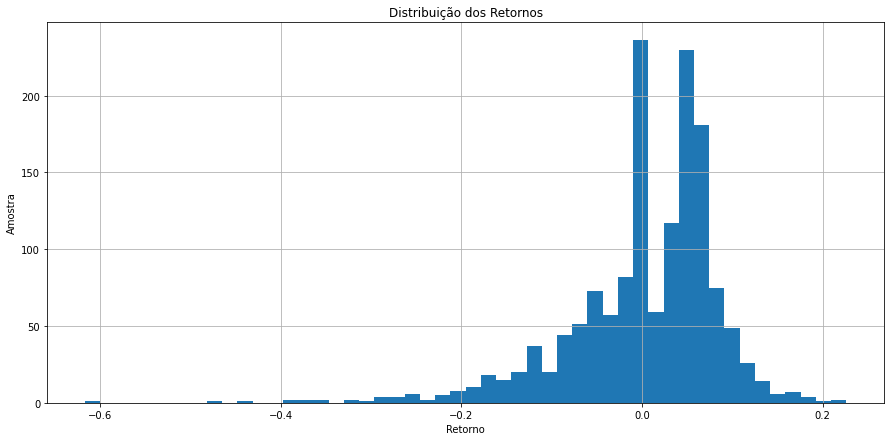

In [265]:
# Return Distribution
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
operations['Return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Retorno')
ax1.set_ylabel('Amostra')
ax1.set_title('Distribuição dos Retornos')
plt.show()

<AxesSubplot:>

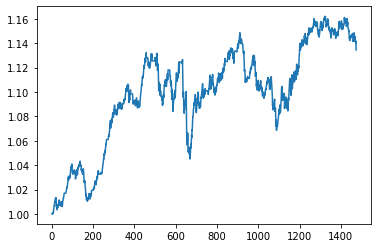

In [266]:
weighted_returns = (operations['Return']) / 35
(weighted_returns+1).cumprod().plot()

In [267]:
# Retorno por par
operations_by_pair = operations.groupby("Pair").sum("Return")
print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair['Return'].mean(),4)}%")

Número de pares: 635
Retorno médio por par: 0.7189%


In [278]:
# Ações com maior participação
stock_count = {}

for pair in operations_by_pair.index:
    stocks = pair.split("-")
    for stock in stocks:   
        if stock in stock_count:
            stock_count[stock] += 1
        else:
            stock_count[stock] = 1
stock_count_df = pd.DataFrame(stock_count.items()) 
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv("../distance_results/stock_count_20_pairs.csv")

In [274]:
# Leitura dos retornos diários dos portfólios e Retornos Risk-Free
daily_returns_cc = pd.read_csv("../distance_results/Rp_ew_cc_20_pairs.csv", header=0)
#daily_returns_cc.columns = ['Return', 'Semester']
print(daily_returns_cc)

risk_free_returns = pd.read_csv("../distance_results/risk_free.csv", header=0, index_col=0)
risk_free_returns.head()

        Return  Semester
0     0.000000       0.0
1    -0.000049       0.0
2     0.000040       0.0
3    -0.000133       0.0
4     0.000514       0.0
...        ...       ...
6168  0.000000       0.0
6169  0.000000       0.0
6170  0.000000       0.0
6171  0.000000       0.0
6172  0.000000       0.0

[6173 rows x 2 columns]


,Return,Semester
0,0.000291,0.0
1,0.000291,0.0
2,0.000291,0.0
3,0.000291,0.0
4,0.000291,0.0


In [275]:
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns_cc['Return'].mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns_cc['Return'].std()

risk_free_mean = risk_free_returns['Return'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Committed Capital Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")

Mean daily return: 4.527181799590723e-05
Mean risk free return: 0.00011410207179005345
Committed Capital Sharpe Ratio: -0.02475086435097848


In [276]:
semester_returns = pd.read_csv("../distance_results/ret_acum_df_20_pairs.csv", header=0, index_col=0)
semester_returns.head()

,CC,FI,RMRF,SEMESTER
0,1.000000,1.000000,1.001433,0.0
1,0.999951,0.999013,0.988685,0.0
2,0.999990,0.999409,0.996014,0.0
3,0.999857,0.998521,0.998781,0.0
4,1.000371,1.001089,0.990073,0.0


In [298]:
semester_returns = semester_returns[semester_returns['RMRF'] != 0]
semester_cumulative_returns = semester_returns.groupby("SEMESTER").last() - 1
print(f"Retorno semestral médio: CC {semester_cumulative_returns['CC'].mean()*100} | FI {semester_cumulative_returns['FI'].mean()*100}")
print(f"Maior retorno: CC {semester_cumulative_returns['CC'].max()*100} | FI {semester_cumulative_returns['FI'].max()*100}")
print(f"Menor retorno: CC {semester_cumulative_returns['CC'].min()*100} | FI {semester_cumulative_returns['FI'].min()*100}")
print(f"Semestres positivos: CC {sum(semester_cumulative_returns['CC'] > 0)} | FI {sum(semester_cumulative_returns['FI'] > 0)}")
print(f"Semestres negativos: CC {sum(semester_cumulative_returns['CC'] < 0)}")
print(f"Retorno acumulado: {np.cumprod(1+semester_cumulative_returns)}")

Retorno semestral médio: CC 0.5785931463410284 | FI 1.2399677354869492
Maior retorno: CC 6.624932451279353 | FI 12.157667210745071
Menor retorno: CC -13.000489848312935 | FI -13.05152001494464
Semestres positivos: CC 32 | FI 33
Semestres negativos: CC 17
Retorno acumulado:                 CC        FI      RMRF
SEMESTER                              
0.0       1.010929  1.018838  0.876513
1.0       1.033114  1.059984  0.774019
2.0       1.059318  1.111352  0.678437
3.0       1.074330  1.132223  0.603301
4.0       1.042142  1.091002  0.528801
5.0       1.041537  1.089461  0.466476
6.0       1.070265  1.145995  0.413703
7.0       1.124825  1.285321  0.365327
8.0       1.169619  1.374101  0.322608
9.0       1.185754  1.400192  0.284884
10.0      1.202420  1.423620  0.249705
11.0      1.185393  1.422941  0.220274
12.0      1.263924  1.592085  0.193073
13.0      1.260512  1.609280  0.171691
14.0      1.206636  1.509894  0.150489
15.0      1.254210  1.594743  0.133822
16.0      1.197768  1.45

In [124]:
stop_loss = -0.07
operations_stop_7 = operations.copy()
should_stop = operations['Return'] < stop_loss
print(should_stop)
operations_stop_7.loc[should_stop,'Return'] = stop_loss

0       False
1       False
2       False
3       False
4       False
        ...  
2510    False
2511    False
2512    False
2513    False
2514     True
Name: Return, Length: 2515, dtype: bool


In [125]:
print(operations_stop_7.tail())
print(f"Converged operations: {sum(operations_stop_7['Converged'])} | Open operations: {np.shape(operations_stop_7)[0] - sum(operations_stop_7['Converged'])}")
print(f"Positive Returns: {sum(operations_stop_7['Return'] > 0)}")
print(f"Highest Return: {operations_stop_7['Return'].max()}")
print(f"Lowest Return: {operations_stop_7['Return'].min()}")
print(f"Average Return: {operations_stop_7['Return'].mean()}")
print(f"Average trade lenght: {operations_stop_7['Days'].mean()}")
#operations_stop_7.groupby(["Semester"])['Return'].cumprod().plot()
#pd.DataFrame(operations_stop_7.groupby(["Semester"])['Return'].cumprod()).to_csv("../distance_results/cumprod.csv", header=None,
#                             index=False, na_rep='NULL')

      Semester  Days    S1   S2      Pair    Return  Converged
2510        48    55  HBAN  ROP  HBAN-ROP  0.064984       True
2511        48    57  HBAN  ROP  HBAN-ROP -0.060442      False
2512        48   126   TMK  AFL   TMK-AFL  0.003478      False
2513        48    91   PCG  CMS   PCG-CMS -0.008282      False
2514        48   126    ED   FE     ED-FE -0.070000      False
Converged operations: 1301 | Open operations: 1214
Positive Returns: 1598
Highest Return: 0.2259076305200185
Lowest Return: -0.07
Average Return: 0.017933945466037476
Average trade lenght: 52.16381709741551


,Semester,Days,Return,Converged
Pair,,,,
0111145D-0961514D,30,123,1.015241,0
0111145D-1288652D,40,112,2.116125,1
0111145D-AEE,74,248,4.038609,1
0111145D-CIN,15,90,1.092108,1
0111145D-CINF,40,48,2.086297,1
...,...,...,...,...
XOM-PPL,43,76,1.047216,1
XOM-SPGI,20,115,1.981018,1
XOM-SYY,42,104,2.172647,2
